In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib


In [38]:

# Load your customer data
X = pd.read_pickle("outputs/X.pkl")
y = pd.read_pickle("outputs/y.pkl")


In [39]:
#  check for missing values
print("Missing values in X:\n", X.isnull().sum())

Missing values in X:
 customer_unique_id         0
total_orders               0
total_spend                0
avg_review_score           0
avg_days_between_orders    0
dtype: int64


In [42]:
# Drop non-numeric column
X = X.drop(columns=['customer_unique_id'])


In [43]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.71


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 #Evaluation metrics
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.7093687517852042

 Confusion Matrix:
 [[ 3946  4269]
 [ 3871 15922]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49      8215
           1       0.79      0.80      0.80     19793

    accuracy                           0.71     28008
   macro avg       0.65      0.64      0.64     28008
weighted avg       0.71      0.71      0.71     28008



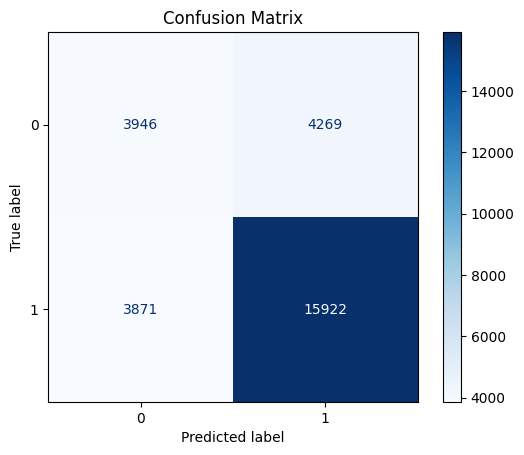

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

C:\Users\asif\AppData\Local\Temp\ipykernel_16256\3225458409.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df.head(10), x='Importance', y='Feature', palette='viridis')


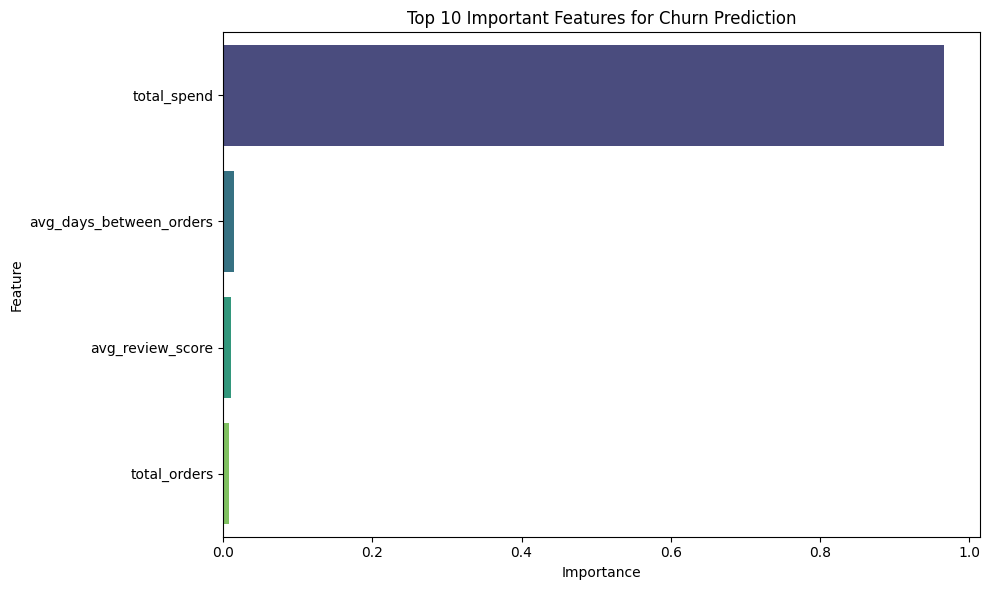

In [51]:
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Put into DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features for Churn Prediction")
plt.tight_layout()
plt.show()


In [52]:
# Save model
joblib.dump(model, "outputs/churn_model.pkl")

['outputs/churn_model.pkl']

##  What This Notebook Does

- This notebook trains a machine learning model to predict which customers are likely to churn based on their purchasing behavior.
- We use Random Forest, a popular classifier that works well with structured/tabular data.
- Evaluation metrics help you understand how well your model is performing.